<a href="https://colab.research.google.com/github/sajid-munawar/Deep_learning/blob/main/Ch_3_Getting_started_with_neural_networks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Classifying movie reviews: 
a binary classification example

In [1]:
from tensorflow.keras.datasets import imdb

In [2]:
(train_data,train_labels),(test_data,test_labels)=imdb.load_data(num_words=10000)

17473536/17464789 [==============================] - 0s 0us/step


In [3]:
len(train_data)

25000

In [4]:
len(train_data[0])

218

In [5]:
train_labels[0]

1

In [6]:
max([max(sequence) for sequence in train_data])

9999

In [7]:
import numpy as np
arr=np.random.randint(1,100,20)

In [8]:
arr

array([40, 90, 53, 11, 72,  1, 80,  6, 34, 35,  6, 79, 64, 26,  9, 68,  7,
       27, 44, 63])

In [9]:
max(arr)

90

one hot encoding , endoding the integers sequnce into a binary matrix

In [10]:
import numpy as np
def vectorize_sequences(sequences, dimension=10000):
  results = np.zeros((len(sequences), dimension))
  for i, sequence in enumerate(sequences):
    results[i, sequence] = 1.
  return results

In [11]:
# import numpy as np
# np.set_printoptions(threshold=np.inf)

In [12]:
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [13]:
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

In [14]:
len(y_train)

25000

The model definition

In [15]:
from keras import models
from keras import layers
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

compiling the model

In [16]:
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

setting aside a validation set

In [17]:
len(x_train)

25000

In [18]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]

In [19]:
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

training the model

In [20]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/20
30/30 [==============================] - 2s 29ms/step - loss: 0.5252 - accuracy: 0.7948 - val_loss: 0.3972 - val_accuracy: 0.8699
Epoch 2/20
30/30 [==============================] - 1s 19ms/step - loss: 0.3130 - accuracy: 0.8987 - val_loss: 0.3067 - val_accuracy: 0.8878
Epoch 3/20
30/30 [==============================] - 1s 20ms/step - loss: 0.2314 - accuracy: 0.9240 - val_loss: 0.2856 - val_accuracy: 0.8861
Epoch 4/20
30/30 [==============================] - 1s 20ms/step - loss: 0.1816 - accuracy: 0.9402 - val_loss: 0.2906 - val_accuracy: 0.8817
Epoch 5/20
30/30 [==============================] - 1s 20ms/step - loss: 0.1500 - accuracy: 0.9505 - val_loss: 0.2779 - val_accuracy: 0.8889
Epoch 6/20
30/30 [==============================] - 1s 20ms/step - loss: 0.1243 - accuracy: 0.9623 - val_loss: 0.3025 - val_accuracy: 0.8842
Epoch 7/20
30/30 [==============================] - 1s 20ms/step - loss: 0.1039 - accuracy: 0.9677 - val_loss: 0.3176 - val_accuracy: 0.8821
Epoch 8/20
30

In [21]:
history_dict=history.history

In [22]:
history_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

Plotting the training and validation loss

In [23]:
import matplotlib.pyplot as plt
loss_values=history_dict['loss']
val_loss_values=history_dict['val_loss']

In [24]:
epochs = range(1, len(history_dict['accuracy']) + 1)

In [25]:
len(history_dict['accuracy'])

20

In [26]:
epochs

range(1, 21)

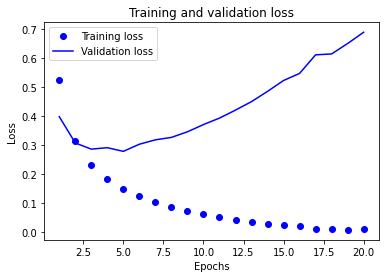

In [27]:
plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

plotting the training and validation accuracy

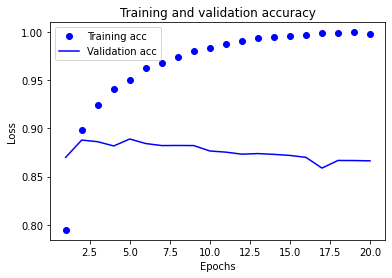

In [28]:
acc_values = history_dict['accuracy']
val_acc_values = history_dict['val_accuracy']
plt.plot(epochs, acc_values, 'bo', label='Training acc')
plt.plot(epochs, val_acc_values, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

retraining a model from scratch

In [29]:
model.fit(x_train, y_train, epochs=4, batch_size=512)
results = model.evaluate(x_test, y_test)

Epoch 1/4
49/49 [==============================] - 1s 15ms/step - loss: 0.2306 - accuracy: 0.9456
Epoch 2/4
49/49 [==============================] - 1s 15ms/step - loss: 0.1403 - accuracy: 0.9601
Epoch 3/4
49/49 [==============================] - 1s 15ms/step - loss: 0.1106 - accuracy: 0.9668
Epoch 4/4
782/782 [==============================] - 1s 1ms/step - loss: 0.4742 - accuracy: 0.8569


In [30]:
results

[0.47418567538261414, 0.8569200038909912]

In [31]:
model.predict(x_test)

array([[0.03163818],
       [0.9999846 ],
       [0.77897954],
       ...,
       [0.09236243],
       [0.04479471],
       [0.7317081 ]], dtype=float32)

Classifying newswires: 
a multiclass classification example

In [32]:
from keras.datasets import reuters

In [43]:
(train_data,train_labels),(test_data,test_labels)=reuters.load_data(num_words=10000)

In [44]:
len(train_data)

8982

In [45]:
len(test_data)

2246

In [46]:
train_labels[0]

3

In [47]:
word_index = reuters.get_word_index()
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
decoded_newswire = ' '.join([reverse_word_index.get(i - 3, '?') for i in train_data[1]])

In [48]:
decoded_newswire

'? generale de banque sa lt ? br and lt heller overseas corp of chicago have each taken 50 pct stakes in ? company sa ? factors generale de banque said in a statement it gave no financial details of the transaction sa ? ? turnover in 1986 was 17 5 billion belgian francs reuter 3'

In [49]:
import numpy as np
def vectorize_sequences(sequences, dimension=10000):
  results = np.zeros((len(sequences), dimension))
  for i, sequence in enumerate(sequences):
    results[i, sequence] = 1.
  return results
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [50]:
def to_one_hot(labels, dimension=46):
  results = np.zeros((len(labels), dimension))
  for i, label in enumerate(labels):
    results[i, label] = 1.
  return results
one_hot_train_labels = to_one_hot(train_labels)
one_hot_test_labels = to_one_hot(test_labels)

built_in method

In [51]:
from keras.utils.np_utils import to_categorical
one_hot_train_labels = to_categorical(train_labels)
one_hot_test_labels = to_categorical(test_labels)

model definition

In [52]:
from keras import models
from keras import layers
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

compiling the model

In [54]:
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

setting aside a validation set

In [55]:
x_val = x_train[:1000]
partial_x_train = x_train[1000:]
y_val = one_hot_train_labels[:1000]
partial_y_train = one_hot_train_labels[1000:]

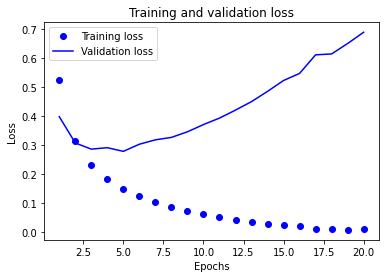

In [56]:
import matplotlib.pyplot as plt
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [57]:
plt.clf()

<Figure size 432x288 with 0 Axes>

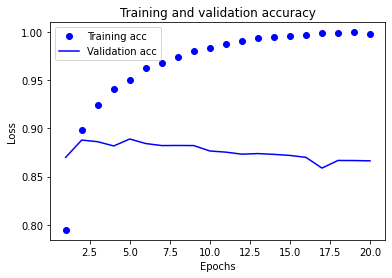

In [59]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

retrain model from scratch

In [60]:
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))
model.compile(optimizer='rmsprop',
loss='categorical_crossentropy',
metrics=['accuracy'])
model.fit(partial_x_train,
partial_y_train,
epochs=9,
batch_size=512,
validation_data=(x_val, y_val))
results = model.evaluate(x_test, one_hot_test_labels)

Epoch 1/9
16/16 [==============================] - 1s 42ms/step - loss: 2.7087 - accuracy: 0.5496 - val_loss: 1.8047 - val_accuracy: 0.6480
Epoch 2/9
16/16 [==============================] - 0s 31ms/step - loss: 1.4495 - accuracy: 0.7027 - val_loss: 1.3350 - val_accuracy: 0.7130
Epoch 3/9
16/16 [==============================] - 1s 33ms/step - loss: 1.0736 - accuracy: 0.7709 - val_loss: 1.1634 - val_accuracy: 0.7530
Epoch 4/9
16/16 [==============================] - 1s 32ms/step - loss: 0.8537 - accuracy: 0.8236 - val_loss: 1.0612 - val_accuracy: 0.7820
Epoch 5/9
16/16 [==============================] - 1s 33ms/step - loss: 0.6869 - accuracy: 0.8566 - val_loss: 1.0005 - val_accuracy: 0.7930
Epoch 6/9
16/16 [==============================] - 1s 33ms/step - loss: 0.5544 - accuracy: 0.8834 - val_loss: 0.9619 - val_accuracy: 0.7990
Epoch 7/9
16/16 [==============================] - 1s 32ms/step - loss: 0.4467 - accuracy: 0.9097 - val_loss: 0.9331 - val_accuracy: 0.8130
Epoch 8/9
16/16 [===

In [61]:
results

[1.0045274496078491, 0.7827248573303223]

In [70]:
import copy
test_labels_copy = copy.copy(test_labels)
np.random.shuffle(test_labels_copy)
hits_array = np.array(test_labels) == np.array(test_labels_copy)
float(np.sum(hits_array)) / len(test_labels)

0.19323241317898487

generating predictions for new data

In [71]:
predictions=model.predict(x_test)

In [72]:
predictions[0].shape

(46,)

In [74]:
np.sum(predictions[0])

1.0000001

In [75]:
np.argmax(predictions[0])

3

predicting house prices: a regression problem